In [24]:
#!pip install matplot
#!pip install pandas
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [25]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [26]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [27]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [28]:
# Splitting the dataset into the Training set and Test set
#!pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [29]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

In [30]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [31]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [32]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6621 - accuracy: 0.6893 - val_loss: 0.5634 - val_accuracy: 0.7876
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7944 - val_loss: 0.5184 - val_accuracy: 0.7944
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5118 - accuracy: 0.7966 - val_loss: 0.4939 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4878 - accuracy: 0.7979 - val_loss: 0.4765 - val_accuracy: 0.7989
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7990 - val_loss: 0.4643 - val_accuracy: 0.7993
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4579 - accuracy: 0.8043 - val_loss: 0.4550 - val_accuracy: 0.8046
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.8089 - val_loss: 0.4476 - val_accuracy: 0.8065

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3707 - accuracy: 0.8461 - val_loss: 0.3849 - val_accuracy: 0.8368
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3697 - accuracy: 0.8472 - val_loss: 0.3841 - val_accuracy: 0.8360
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3688 - accuracy: 0.8485 - val_loss: 0.3836 - val_accuracy: 0.8364
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8487 - val_loss: 0.3827 - val_accuracy: 0.8368
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8489 - val_loss: 0.3820 - val_accuracy: 0.8383
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8492 - val_loss: 0.3813 - val_accuracy: 0.8402
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3651 - accuracy: 0.8494 - val_loss: 0.3807 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


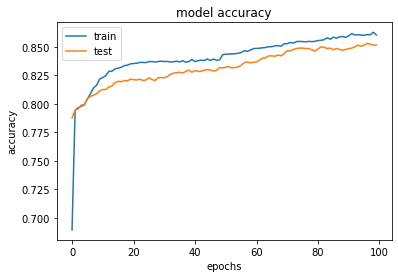

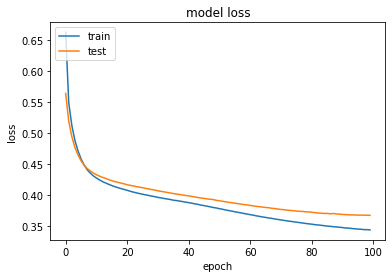

In [35]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)